# Setup

Clone YOLOv5 repo, install dependencies and check PyTorch and GPU.

In [ ]:
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
%pip install -qr requirements.txt  # install dependencies

Setup completed. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


In [ ]:
import torch
from IPython.display import Image, clear_output  # to display images

clear_output()
print('Setup completed. Using torch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

Setup completed. Using torch 1.8.1+cu101 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


In [ ]:
!pwd

/content


In [ ]:
%cd yolov5

/content/yolov5


In [ ]:
!nvidia-smi

Mon Apr 19 13:12:33 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P8     9W /  75W |      2MiB /  7611MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Prepare dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!unzip -q "/content/drive/MyDrive/AI-ML/datasets/carvansara_yolo.zip" -d "/content"

In [ ]:
dataset_yaml_txt= """
# train and val data 
train: /content/carvansara_yolo/train
val: /content/carvansara_yolo/test

# number of classes
nc: 1

# class names
names: ['carvansara',]
"""

with open("data/carvansara.yaml", "w") as f:
    f.write(dataset_yaml_txt)

## Weights & Biases Logging




In [ ]:
!pip install wandb
!wandb login 8547bbc8a42f4383966c0fc9c58a7520d51fa485
clear_output()
print("Weights & Biases Setup completed.")

Weights & Biases Setup completed.


# Train the models

In [ ]:

hyp = """
lr0: 0.01  # initial learning rate (SGD=1E-2, Adam=1E-3)
lrf: 0.2  # final OneCycleLR learning rate (lr0 * lrf)
momentum: 0.937  # SGD momentum/Adam beta1
weight_decay: 0.0005  # optimizer weight decay 5e-4
warmup_epochs: 3.0  # warmup epochs (fractions ok)
warmup_momentum: 0.8  # warmup initial momentum
warmup_bias_lr: 0.1  # warmup initial bias lr
box: 0.05  # box loss gain
cls: 0.5  # cls loss gain
cls_pw: 1.0  # cls BCELoss positive_weight
obj: 1.0  # obj loss gain (scale with pixels)
obj_pw: 1.0  # obj BCELoss positive_weight
iou_t: 0.20  # IoU training threshold
anchor_t: 4.0  # anchor-multiple threshold
# anchors: 3  # anchors per output layer (0 to ignore)
fl_gamma: 0.0  # focal loss gamma (efficientDet default gamma=1.5)
hsv_h: 0.015  # image HSV-Hue augmentation (fraction)
hsv_s: 0.7  # image HSV-Saturation augmentation (fraction)
hsv_v: 0.4  # image HSV-Value augmentation (fraction)
degrees: 75.0  # image rotation (+/- deg)
translate: 0.1  # image translation (+/- fraction)
scale: 0.25  # image scale (+/- gain)
shear: 0.001  # image shear (+/- deg)
perspective: 0.0  # image perspective (+/- fraction), range 0-0.001
flipud: 0.5  # image flip up-down (probability)
fliplr: 0.5  # image flip left-right (probability)
mosaic: 0.0 # image mosaic (probability)
mixup: 0.0  # image mixup (probability)
"""
with open("/content/yolov5/data/n_hyp.scratch.yaml", "w") as f:
    f.write(hyp)

In [ ]:
!python train.py --img 448 --batch 12 --epochs 50  --single-cls --project "carvansara" --name "640_yolov5l_50_"  --hyp "data/n_hyp.scratch.yaml" --data carvansara.yaml --weights yolov5l.pt

github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v5.0-14-g238583b torch 1.8.1+cu101 CUDA:0 (Tesla P4, 7611.9375MB)

Namespace(adam=False, artifact_alias='latest', batch_size=12, bbox_interval=-1, bucket='', cache_images=False, cfg='', data='./data/carvansara.yaml', device='', entity=None, epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='data/n_hyp.scratch.yaml', image_weights=False, img_size=[448, 448], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='640_yolov5l_50_', noautoanchor=False, nosave=False, notest=False, project='carvansara', quad=False, rect=False, resume=False, save_dir='carvansara/640_yolov5l_50_2', save_period=-1, single_cls=True, sync_bn=False, total_batch_size=12, upload_dataset=False, weights='yolov5l.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir carvansara', view at http://localhost:6006/
2021-04-19 14:06:13.396704: I tensorflow/stream_executor/platform/default/dso_loader

## test


In [ ]:
!python test.py  --project "carvansara" --weights "carvansara/640_yolov5l_50_2/weights/best.pt" --data carvansara.yaml --task test

Namespace(augment=False, batch_size=32, conf_thres=0.001, data='./data/carvansara.yaml', device='', exist_ok=False, img_size=640, iou_thres=0.6, name='exp', project='carvansara', save_conf=False, save_hybrid=False, save_json=False, save_txt=False, single_cls=False, task='test', verbose=False, weights=['carvansara/640_yolov5l_50_2/weights/best.pt'])
YOLOv5 🚀 v5.0-14-g238583b torch 1.8.1+cu101 CUDA:0 (Tesla P4, 7611.9375MB)

Fusing layers... 
Model Summary: 392 layers, 46600566 parameters, 0 gradients, 114.1 GFLOPS
test: Scanning '/content/carvansara_yolo/test/labels.cache' images and labels... 210 found, 0 missing, 148 empty, 0 corrupted: 100% 210/210 [00:00<00:00, 1944379.34it/s]
               Class      Images      Labels           P           R      mAP@.5  mAP@.5:.95: 100% 7/7 [00:15<00:00,  2.17s/it]
                 all         210          62       0.723       0.548       0.606       0.236
Speed: 61.4/1.8/63.2 ms inference/NMS/total per 640x640 image at batch-size 32
Results sav

In [ ]:
%ls

carvansara/  hubconf.py    README.md*         train.py        weights/
data/        LICENSE       requirements.txt*  tutorial.ipynb  yolov5l.pt
detect.py    models/       runs/              utils/          yolov5m.pt
Dockerfile   __pycache__/  test.py            wandb/          yolov5s.pt


# test model

In [ ]:

!python detect.py --weights "carvansara/640_yolov5l_50_2/weights/best.pt" --img 640 --conf 0.25 --source "/content/carvansara_yolo/test/images"
#clear_output()

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, img_size=640, iou_thres=0.45, name='exp', nosave=False, project='runs/detect', save_conf=False, save_txt=False, source='/content/carvansara_yolo/test/images', update=False, view_img=False, weights=['carvansara/640_yolov5l_50_2/weights/best.pt'])
YOLOv5 🚀 v5.0-14-g238583b torch 1.8.1+cu101 CUDA:0 (Tesla P4, 7611.9375MB)

Fusing layers... 
Model Summary: 392 layers, 46600566 parameters, 0 gradients, 114.1 GFLOPS
image 1/210 /content/carvansara_yolo/test/images/001_g1_bing_600x600.png: 640x640 Done. (0.069s)
image 2/210 /content/carvansara_yolo/test/images/001_google_600x600.png: 640x640 Done. (0.064s)
image 3/210 /content/carvansara_yolo/test/images/002_g1_google_600x600.png: 640x640 Done. (0.062s)
image 4/210 /content/carvansara_yolo/test/images/003_g2_google_600x600.png: 640x640 Done. (0.059s)
image 5/210 /content/carvansara_yolo/test/images/004_bing_600x600.png: 640x640 Done. (0.057s

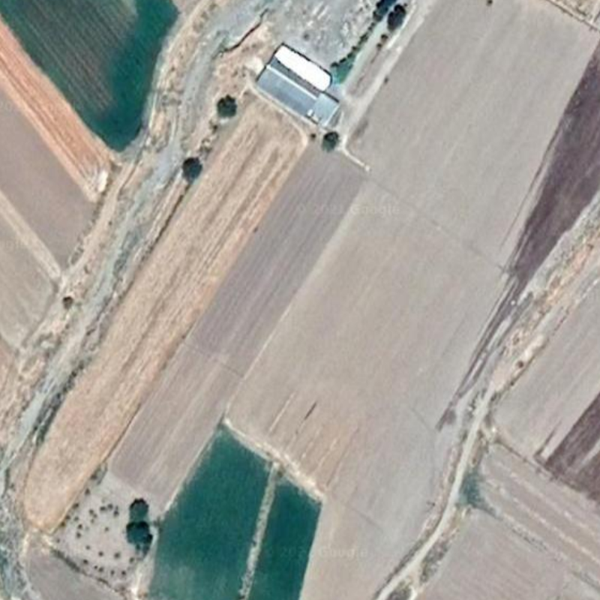

In [ ]:
Image(filename='runs/detect/exp3/p020_g1_google_600x600.png', width=800)

In [ ]:
!zip -r /content/caravansara_output.zip /content/yolov5/runs

  adding: content/yolov5/runs/ (stored 0%)
  adding: content/yolov5/runs/detect/ (stored 0%)
  adding: content/yolov5/runs/detect/exp3/ (stored 0%)
  adding: content/yolov5/runs/detect/exp3/p001_g1_bing_600x600.png (deflated 1%)
  adding: content/yolov5/runs/detect/exp3/140_g1_bing_600x600.png (deflated 4%)
  adding: content/yolov5/runs/detect/exp3/104_g2_bing_600x600.png (deflated 7%)
  adding: content/yolov5/runs/detect/exp3/112_g2_google_600x600.png (deflated 9%)
  adding: content/yolov5/runs/detect/exp3/016_g1_google_600x600.png (deflated 5%)
  adding: content/yolov5/runs/detect/exp3/086_g1_google_600x600.png (deflated 2%)
  adding: content/yolov5/runs/detect/exp3/085_google_600x600.png (deflated 3%)
  adding: content/yolov5/runs/detect/exp3/036_g1_google_600x600.png (deflated 5%)
  adding: content/yolov5/runs/detect/exp3/023_google_600x600.png (deflated 4%)
  adding: content/yolov5/runs/detect/exp3/006_google_600x600.png (deflated 8%)
  adding: content/yolov5/runs/detect/exp3/057_

In [ ]:
from google.colab import files
files.download("/content/caravansara_output.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>